In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
#my version of seaborn is 0.9.0. So if you have a lower version, there may be some graphs that can not be plotted 
%matplotlib inline

In [2]:
sns.__version__

'0.9.0'

In [3]:
train= pd.read_csv('train.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Dictionary

- Survived: 0 = No, 1 = Yes
- pclass: Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd
- sibsp: # of siblings / spouses aboard the Titanic
- parch: # of parents / children aboard the Titanic
- ticket: Ticket number
- cabin: Cabin number
- embarked: Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

# Data Visualization and Exploration
In this step, we will create graphs to spot some insights out of the data and develop our hypothesises from those charts

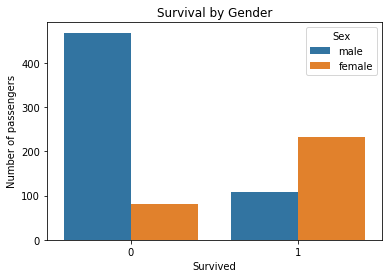

In [5]:
sns.countplot(x='Survived', hue= 'Sex', data= train).set_title('Survival by Gender')
plt.ylabel('Number of passengers')
plt.show()

- The chart shows that women are more likely to survive than men

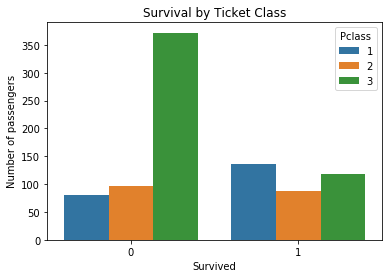

In [6]:
sns.countplot(x='Survived', hue= 'Pclass', data= train).set_title('Survival by Ticket Class')
plt.ylabel('Number of passengers')
plt.show()

- The chart confirms that people on the third class are more likely to die. On the other hand, peole on the first class are more likely to survive

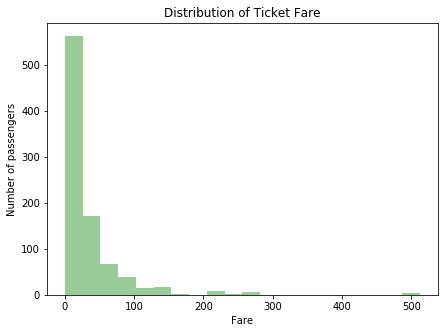

In [7]:
fig= plt.figure(figsize=(7,5))
sns.distplot(train['Fare'], kde= False, bins=20, color='g')
plt.title('Distribution of Ticket Fare')
plt.ylabel('Number of passengers')
plt.show()

- The distribution of the ticket fare is positively skewed with some extreme outliers. The outliers can pose some issues for our model. To solve this, we can standardise this array.

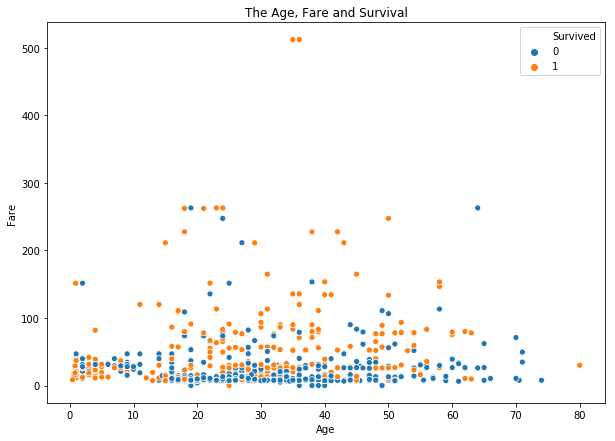

In [8]:
fig = plt.figure(figsize=(10,7))
sns.scatterplot(x='Age', y='Fare',data=train, hue='Survived').set_title('The Age, Fare and Survival')
plt.show()

- The scatter plot shows that children whose ages are less than 10 are the most likely to survive. More over, people with a higher ticket fare have more probability to survive

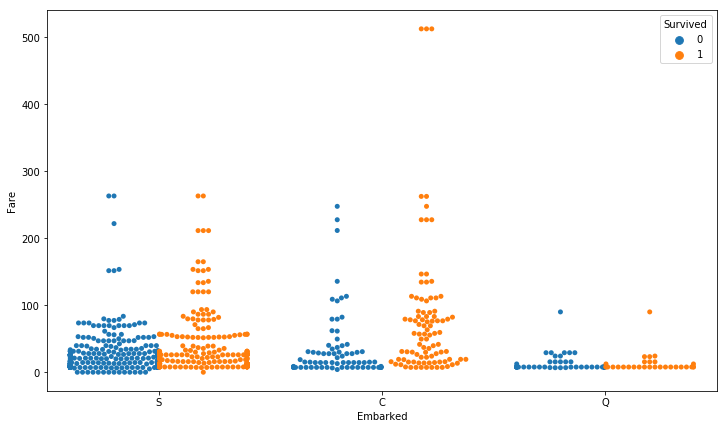

In [9]:
fig = plt.figure(figsize=(12,7))
sns.swarmplot(x='Embarked', y='Fare', hue='Survived', data=train, dodge=True)
plt.show()

- The graph above is a beeswarm plot. The plot is similiar to a scatter plot which display each record as a point. The difference between these two kinds is the beeswarm plot does not make the points close to each other to avoid overlap
- The graph shows the different characteristics of the three ports. Most people embarked from Southamption while it is opposite to Queenstown this can be useful when we fill in the missing data for this column. The embarkation Cherbourg has a wider range of fare tickets and people who paid the most survived. 

In the data, we have two columns, SibSp and Parch. They shows the numbers of spouses, sibling, children and parents of indiviual passengers. We can actually combine these fields into another field that displays the number of family members for each passenger. We will name the field as 'FamSize'.

In [10]:
train['FamSize']= train['SibSp'] + train['Parch'] + 1
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamSize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


Hence, let explore how family size relate to the probability of survival for each passenger

<Figure size 720x504 with 0 Axes>

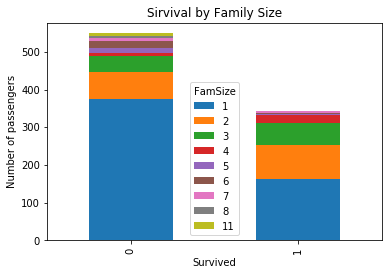

In [11]:
famsize_plot = train.groupby(['FamSize', 'Survived']).size().reset_index().pivot(columns='FamSize', index='Survived', values=0)
fig = plt.figure(figsize=(10,7))
famsize_plot.plot(kind='bar',stacked=True)
plt.title('Sirvival by Family Size')
plt.ylabel('Number of passengers')
plt.show()

- Passengers whose family size is 1 can be defined as being single on board. They were more likely to die 

With the analysis above, we can image which features should be included in our model. We can move to the next to modify the data so that we can plug its values into our model

# Filling missing values


In [12]:
train.isnull().sum() #fining number of NaN

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
FamSize          0
dtype: int64

Those are the numbers of missing values in each column
We have three columns that contain missing values: Age, Embarked and Cabin

For Age, we would use the median Age to fill in the missing data. However, it might not be a good approximation if we use the median of the whole sample. Therefore, we find the median ages of groups base on passengers' gender and ticket class to get a closer approximation. 

For Embarked, we fill the missing values with the most frequent value. Although this method is simple, it might not affect our model significantly since there are only 2 null values in this column.

For Cabin, since the column misses 80% of the data, it can be hard to esimate those value. Therefore, to avoid a large error for our model we will just drop the column.

### Filling Age

In [13]:
groups=train.groupby(['Sex','Pclass']) #grou by Sex and Pclass
groups['Age'].median()

Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64

In [14]:
train['Age']=groups['Age'].apply(lambda x: x.fillna(x.median())) # fill the median value above to the missing field

### Filling Embarked

In [15]:
train['Embarked'].value_counts() #finding the values' frequencies

S    644
C    168
Q     77
Name: Embarked, dtype: int64

- So most people embarked from Southampton

In [16]:
train['Embarked'].fillna('S', inplace= True) #fill in the missing value

In [17]:
train.drop('Cabin',axis=1,inplace= True)

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null object
FamSize        891 non-null int64
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


- As a result, the data no longer contains any missing value

# Feature Engineering



In this step, we will convert the data into a form that can be fit with the alogrithm for our model

### Todo:
- Dummy vairables: Pclass, Sex, Single and Embarked
- Try Standardize: Age and Fare

In [19]:
train.head() #let's look at the data again

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamSize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


### Dummy variable:

In [20]:
def getdummy(feature,drop=True):
    dummy=pd.get_dummies(train[feature], drop_first= drop)
    return dummy

In [21]:
sex= getdummy('Sex')
pclass= getdummy('Pclass')
embarked= getdummy('Embarked')
single= getdummy('FamSize', drop=False)[1]

In [22]:
train_fe=pd.concat([train,sex,pclass,embarked,single],axis=1)
train_fe.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamSize,male,2,3,Q,S,1
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,1,0,1,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,0,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,0,0,1,0,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,0,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,1,0,1,0,1,1


- We have columns 2 and 3 which are for the ticket class while 1 is stating if a passenger boarded alone. To avoid any confusion, we will change the name of those fields. For the class, we change to 2nd and 3rd and we repalce 1 by single

In [23]:
train_fe.rename(columns={2:'2nd',3:'3rd',1:'Single'}, inplace=True)
train_fe.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamSize,male,2nd,3rd,Q,S,Single
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,1,0,1,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,0,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,0,0,1,0,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,0,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,1,0,1,0,1,1


### Standardise Numerical Data

In [24]:
train_fe.drop(['Age','Fare'],axis=1,inplace=True) #to avoid any confusion when we concatinate the standardise values to our datafarme
train_fe.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Embarked,FamSize,male,2nd,3rd,Q,S,Single
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,S,2,1,0,1,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,C,2,0,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,S,1,0,0,1,0,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,S,2,0,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,S,1,1,0,1,0,1,1


In [25]:
def standardise(x):
    mean=np.mean(x,axis=0)
    std=np.std(x,axis=0)
    x=(x-mean)/std
    return x

age_norm= standardise(train['Age'])
fare_norm= standardise(train['Fare'])
train_fe=pd.concat([train_fe, age_norm, fare_norm],axis=1)
train_fe.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Embarked,FamSize,male,2nd,3rd,Q,S,Single,Age,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,S,2,1,0,1,0,1,0,-0.534891,-0.502445
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,C,2,0,0,0,0,0,0,0.668392,0.786845
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,S,1,0,0,1,0,1,1,-0.234070,-0.488854
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,S,2,0,0,0,0,1,0,0.442776,0.420730
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,S,1,1,0,1,0,1,1,0.442776,-0.486337


- Now we can remove the columns that we do not include in our model. So that we have a nice dataframe labeling all the features needed

In [26]:
train_fe.drop(['PassengerId','Sex','SibSp','Parch','Ticket','FamSize','Embarked','Name','Pclass'],axis=1,inplace= True)
train_fe.head()

,Survived,male,2nd,3rd,Q,S,Single,Age,Fare
0,0,1,0,1,0,1,0,-0.534891,-0.502445
1,1,0,0,0,0,0,0,0.668392,0.786845
2,1,0,0,1,0,1,1,-0.234070,-0.488854
3,1,0,0,0,0,1,0,0.442776,0.420730
4,0,1,0,1,0,1,1,0.442776,-0.486337


- Now the data is ready to be implemented in the alogrithm

# Algorithm 

#### Compute negative log likelihood
- Sigmoid Function:  $\sigma(z) =  \frac{\mathrm{e^z} }{\mathrm{1} + e^z }$


- Loss Function: $L(w)=\sum_{i=1}^{s}\left \{\left(log(1+exp(\langle \widetilde x_i,w \rangle)\right)-y_i\langle \widetilde x,w \rangle\right \}$


- Gradient: $ \bigtriangledown L(w)= X^T(\sigma(Xw)-y)$

In [27]:
def sigmoid(z):
    sigmoid = (np.exp(z))/(1+np.exp(z))
    return sigmoid
    
def calculate_loss(y,tx,w):
    Z = tx.dot(w)
    g = np.log(1+np.exp(Z))
    Y = y*Z
    loss = np.sum(g-Y)
    return loss

def calculate_gradient(y,tx,w):
    sigz = sigmoid(tx.dot(w))
    return np.dot(tx.T,sigz-y)

The gradient descent for our logistic regression is:
$$w^{k+1}=w^k-\tau \bigtriangledown L(w)$$
     for some initial  $w_0$ 

###  Logistic Ridge Regression

- Loss Function: $L(w)=\sum_{i=1}^{s}\left \{\left(log(1+exp(\langle \widetilde x_i,w \rangle)\right)-y_i\langle \widetilde x,w \rangle\right \}+ \alpha\|w\|^2$


- Gradient: $ \bigtriangledown L(w)= X^T(\sigma(Xw)-y)+\alpha w$

In [36]:
def penalised_logistic_regression(y, tx, w, alpha):
    grad= calculate_gradient(y,tx,w) + 2*alpha*w
    loss= calculate_loss(y,tx,w)+ alpha*(np.sum(w**2))
    return loss, grad


def learning_by_penalised_gradient(y, tx, w, tau, alpha):
    loss, grad = penalised_logistic_regression(y,tx,w,alpha)
    w= w-tau*grad
    return loss, w

### Polynomial Basis Function:
- Augmentation of input with polynomial basis of degree $d$:  $\phi(x_j)=\left(1\:x_1\:x^2_2\:...\:x^d_j\right)^T$


- Hence, our features will be transformed into this matrix: 
 $\Phi(X)=\begin{bmatrix}
           \phi(x_{1})^T \\
           \phi(x_{2})^T \\
           \vdots \\
           \phi(x_{s})^T
         \end{bmatrix} \in R^{(d+1)\times s}$ 

In [29]:
def build_poly(x,degree):
    poly=np.ones((len(x),1))
    for deg in range(1,degree+1):
        poly=np.c_[poly,np.power(x,deg)]
    return poly

In [30]:
def polynomial_ridge_regression(y,x, tau,alpha, degree):
    """Constructing the polynomial basis function expansion of the data,
       and then running logistic regression."""
    # define parameters
    max_iter = 100000
    threshold = 1e-5
    tx=build_poly(x,degree)
    w=np.zeros((tx.shape[1],1))
    losses=[]
    
    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_penalised_gradient(y, tx, w, tau, alpha)
        # log info
        if iter % 100 == 0:
            print("Current iteration={i}, loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    print("loss={l} \nw= {weight}".format(l=calculate_loss(y, tx, w), weight=w.T))

In [31]:
def polynomial_ridge_regression_getw(y,x, tau,alpha, degree):
    """Constructing the polynomial basis function expansion of the data,
       and then running logistic regression."""
    # define parameters
    max_iter = 10000
    threshold = 1e-5
    tx=build_poly(x,degree)
    w=np.zeros((tx.shape[1],1))
    losses=[]
    
    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_penalised_gradient(y, tx, w, tau, alpha)
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    return w

# Testing the model

### Spliting the data

In [32]:
def split(y,x,ratio,myseed=1):
    ''''function to split the data into train and test datasets'''
    #set seed
    np.random.seed(myseed)
    #random indices
    num_row=len(y)
    indices=np.random.permutation(num_row)
    i_split=int(np.floor(ratio*num_row))
    i_train=indices[ :i_split]
    i_test=indices[i_split:]
    #spliting the data
    x_train=x[i_train]
    y_train=y[i_train]
    x_test=x[i_test]
    y_test=y[i_test]
    return x_train,y_train,x_test,y_test

In [37]:
#Define the parameters and split the data
x=np.array(train_fe.drop('Survived',axis=1))
y=np.array(train_fe['Survived'])
y = np.expand_dims(y,axis=1)
x_train,y_train,x_test,y_test=split(y,x,ratio=0.6)

### Optimise the model with the train dataset

- we test to run our gradient descent with learning rates between $10^{-1}$ to $10^{-7}$
- After few rounds of trials, we find that these are the suitable learning rates for each degree as they converge the loss function at the fastest rate (counting the number of iterations) 

### Fitting the test dataset

In [42]:
def test(x,w):
    #creating function for testing
    prediction=[]
    tx = np.c_[np.ones((x.shape[0], 1)), x]
    yhat=sigmoid(tx.dot(w))
    for i in yhat:
        if i >= 0.5:
            prediction.append(1)
        else:
            prediction.append(0)
    return prediction

def accuracy(prediction,y_test):
    #function for the accuracy of models
    correct=0
    for i in range(len(prediction)):
        if prediction[i]==y_test[i]:
            correct += 1
    return correct/len(prediction)

#### Firstly, we will check the accuracies of the logistic models with different polynomial degrees. We can check this by setting Alpha to zero in the ridge regression

In [43]:
def test_poly(x,w,degree):
    #creating function for testing
    prediction=[]
    tx=build_poly(x,degree)
    yhat=sigmoid(tx.dot(w))
    for i in yhat:
        if i >= 0.5:
            prediction.append(1)
        else:
            prediction.append(0)
    return prediction

def plot_accuracy_polynomial(degrees, accuracies):
    plt.plot(degrees, accuracies, marker='*', color='b')
    plt.xlabel('Degree')
    plt.ylabel('Accuracy')
    plt.title('Polynomial Regressions with different degrees')
    plt.savefig("polynomial_regression")
    
def polynomial_accuracy():
    #load data
    x=x_test
    y=y_test
    alpha=0
    #define degree
    degrees=[i for i in range(1,5)]
    #define accuracy
    accuracies=[]
    #define learning_rate
    taus=[1e-3,1e-4,1e-4,1e-6]
    #ridge regression with different alpha:
    for degree, tau in zip(degrees,taus):
        #run regression
        weight=polynomial_ridge_regression_getw(y_train,x_train, tau,alpha,degree)
        #set up prediction and accuracy
        prediction=test_poly(x,weight,degree)
        probability=accuracy(prediction,y)
        accuracies.append(probability)
        print('tau= {t},degree= {d}, Accuracy= {p:.2f}%'.format(t=tau,d=degree,p=probability*100))
    plot_accuracy_polynomial(degrees, accuracies)

tau= 0.001,degree= 1, Accuracy= 81.23%
tau= 0.0001,degree= 2, Accuracy= 82.63%
tau= 0.0001,degree= 3, Accuracy= 82.07%
tau= 1e-06,degree= 4, Accuracy= 70.03%


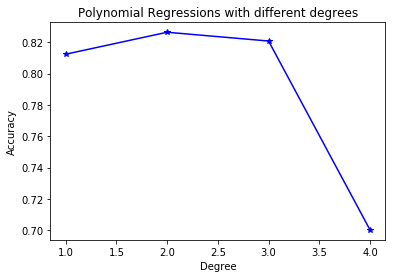

In [44]:
polynomial_accuracy()

#### Now we will try how ridgre regression performs for the dataset. We run tests with different alphas and polynomial degrees to find the best accuracies

In [45]:
def test_poly(x,w,degree):
    #creating function for testing
    prediction=[]
    tx=build_poly(x,degree)
    yhat=sigmoid(tx.dot(w))
    for i in yhat:
        if i >= 0.5:
            prediction.append(1)
        else:
            prediction.append(0)
    return prediction

def polynomial_ridge_accuracy():
    #load data
    x=x_test
    y=y_test
    #ploting parameters
    alpha_points=[]
    degree_points=[]
    #define alpha
    alphas=np.logspace(-5,0,6)
    alphas=list(alphas)
    for i in range(2,11):
        alphas.append(i)
    #define degree
    degrees=[i for i in range(1,5)]
    #define accuracy
    accuracies=[]
    #define learning_rate
    taus=[1e-3,1e-4,1e-4,1e-6]
    #ridge regression with different alpha:
    for alpha in alphas:
        for degree, tau in zip(degrees,taus):
            #run regression
            weight=polynomial_ridge_regression_getw(y_train,x_train, tau,alpha,degree)
            #set up prediction and accuracy
            prediction=test_poly(x,weight,degree)
            probability=accuracy(prediction,y)
            accuracies.append(probability)
            alpha_points.append(alpha)
            degree_points.append(degree)
    return alpha_points,degree_points,accuracies
    

In [49]:
Alpha,Degree,Probability=polynomial_ridge_accuracy()
Probability=[i*100 for i in Probability]
data_points={'Alpha':Alpha,'Degree':Degree,'Accuracy':Probability}
df=pd.DataFrame(data=data_points)
df.head()

,Alpha,Degree,Accuracy
0,0.00001,1,81.232493
1,0.00001,2,82.633053
2,0.00001,3,83.473389
3,0.00001,4,70.028011
4,0.00010,1,81.232493


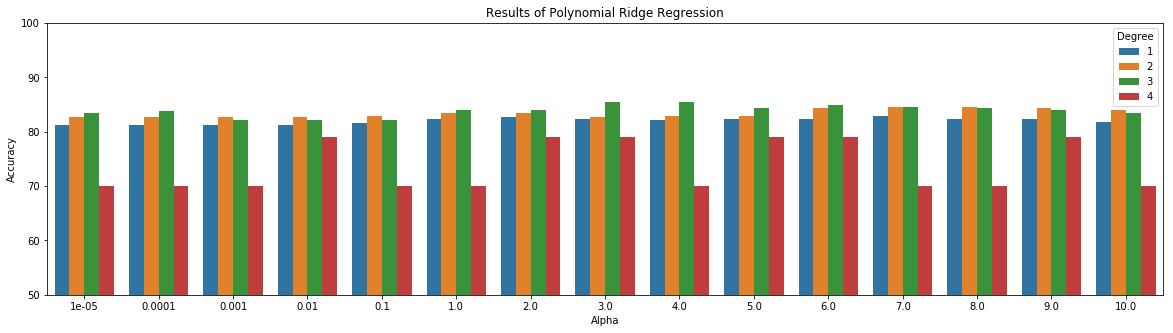

In [81]:
fig=plt.figure(figsize=(20,5))
sns.barplot(df['Alpha'],df['Accuracy'],hue=df['Degree']).set_title('Results of Polynomial Ridge Regression')
plt.ylim(50,100)
plt.show()

In [82]:
index=np.argmax(Probability)
print('The best accuracy is {p:.2f}% for Alpha={a} and Degree={d}'.format(p=max(Probability),
                                                                                a=Alpha[index],d=Degree[index]))

The best accuracy is 85.43% for Alpha=3 and Degree=3
